In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

# Загрузка данных

In [2]:
trans1 = pd.read_csv("data/data_train/data_train/2_trans_100.csv")
trans2 = pd.read_csv("data/data_train/data_train/2_trans_2803.csv")
trans3 = pd.read_csv("data/data_train/data_train/2_trans_1017.csv")
trans4 = pd.read_csv("data/data_train/data_train/2_trans_1018.csv")

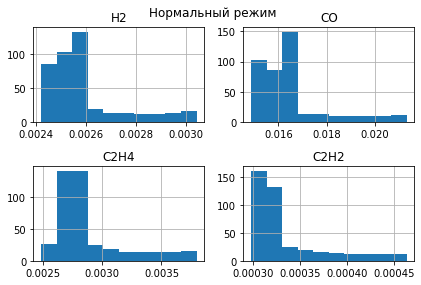

In [3]:
trans1.hist();
plt.tight_layout();
plt.suptitle("Нормальный режим");

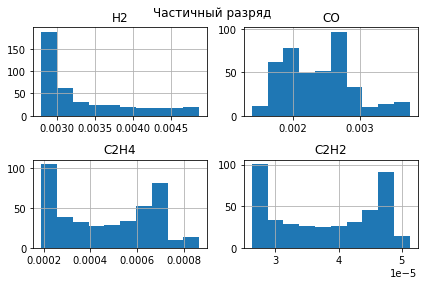

In [4]:
trans2.hist();
plt.tight_layout();
plt.suptitle("Частичный разряд");

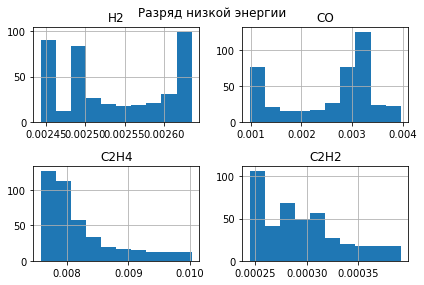

In [5]:
trans3.hist();
plt.tight_layout();
plt.suptitle('Разряд низкой энергии');

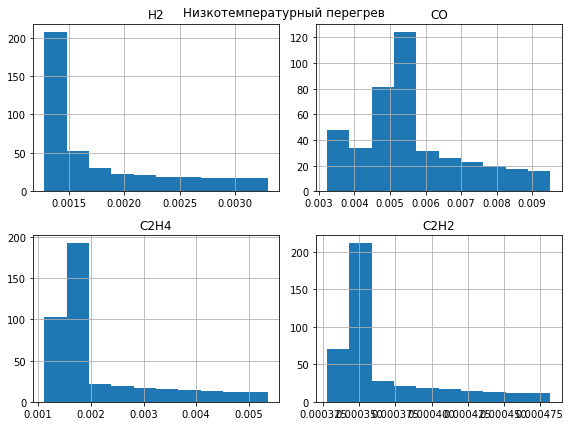

In [6]:
trans4.hist(figsize = (8,6));
plt.tight_layout();
plt.suptitle('Низкотемпературный перегрев');

<AxesSubplot:>

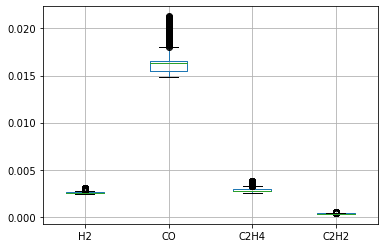

In [7]:
trans1.boxplot()

In [10]:
trans1.head(15)

,H2,CO,C2H4,C2H2
0,0.002420,0.015449,0.002487,0.000298
1,0.002422,0.015470,0.002492,0.000298
2,0.002425,0.015491,0.002496,0.000299
3,0.002428,0.015512,0.002502,0.000299
4,0.002430,0.015534,0.002507,0.000299
5,0.002433,0.015555,0.002512,0.000300
6,0.002436,0.015577,0.002517,0.000300
7,0.002438,0.015598,0.002522,0.000300
8,0.002441,0.015620,0.002527,0.000301
9,0.002444,0.015642,0.002532,0.000301


In [11]:
trans1.shape, trans2.shape, trans3.shape, trans4.shape

((420, 4), (420, 4), (420, 4), (420, 4))

In [15]:
list(zip(range(trans1.shape[1]),trans1.columns))

[(0, 'H2'), (1, 'CO'), (2, 'C2H4'), (3, 'C2H2')]

Text(0.5, 1.0, 'Низкотемпературный перегрев')

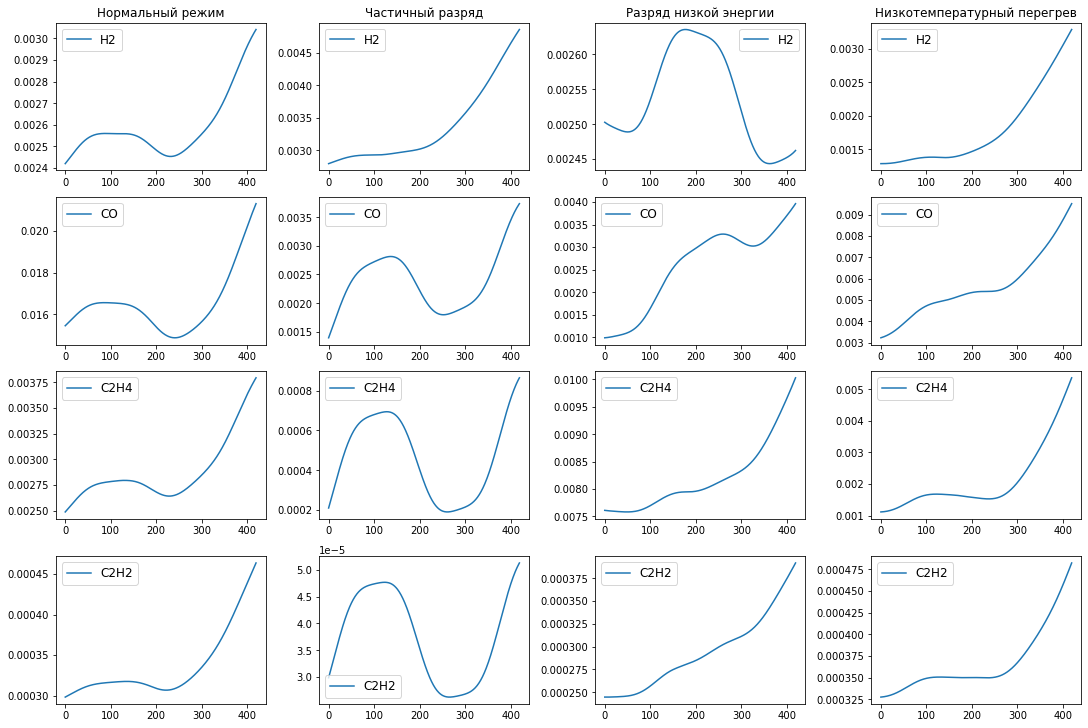

In [12]:
fig, ax = plt.subplots(trans1.shape[1], 4, figsize=(15, 10), constrained_layout=True)
for i, name in enumerate(trans1.columns):
    ax[i,0].plot(trans1.iloc[:,i], label = name)
    ax[i,0].legend(fontsize = 12)
for i, name in enumerate(trans1.columns):
    ax[i,1].plot(trans2.iloc[:,i], label = name)
    ax[i,1].legend(fontsize = 12)
for i, name in enumerate(trans1.columns):
    ax[i,2].plot(trans3.iloc[:,i], label = name)
    ax[i,2].legend(fontsize = 12)
for i, name in enumerate(trans1.columns):
    ax[i,3].plot(trans4.iloc[:,i], label = name)
    ax[i,3].legend(fontsize = 12)
ax[0,0].set_title('Нормальный режим', fontsize = 12)
ax[0,1].set_title('Частичный разряд', fontsize = 12)
ax[0,2].set_title('Разряд низкой энергии', fontsize = 12)
ax[0,3].set_title('Низкотемпературный перегрев', fontsize = 12)

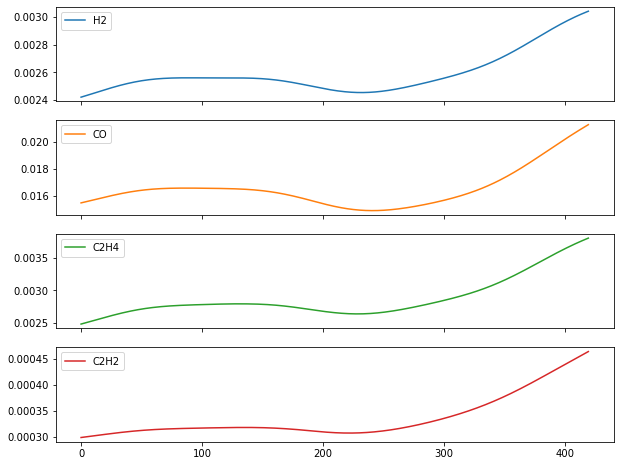

In [14]:
trans1.plot(subplots = True, figsize = (10,8));

In [4]:
train_labels = pd.read_csv("data/train.csv")
train_labels.sort_values("id", inplace = True)
train_labels.set_index("id", inplace = True)

In [5]:
train_labels

,category
id,
2_trans_100.csv,1
2_trans_1000.csv,1
2_trans_1001.csv,1
2_trans_1002.csv,1
2_trans_1006.csv,1
...,...
2_trans_993.csv,1
2_trans_994.csv,3
2_trans_995.csv,3


# Предобработка, выделение признаков

In [6]:
df_mean = pd.DataFrame(index = ['H2_mean', 'CO_mean', 'C2H4_mean', 'C2H2_mean'])
#for file in os.listdir('data/data_train/data_train/2_trans_100.csv):
df2 = pd.read_csv(f"data/data_train/data_train/2_trans_100.csv", sep = ",")
df2.columns = ['H2_mean', 'CO_mean', 'C2H4_mean', 'C2H2_mean']
df_mean['2_trans_100.csv'] = pd.DataFrame(df2.mean(), columns=['2_trans_100.csv'])

In [7]:
df2

,H2_mean,CO_mean,C2H4_mean,C2H2_mean
0,0.002420,0.015449,0.002487,0.000298
1,0.002422,0.015470,0.002492,0.000298
2,0.002425,0.015491,0.002496,0.000299
3,0.002428,0.015512,0.002502,0.000299
4,0.002430,0.015534,0.002507,0.000299
...,...,...,...,...
415,0.003027,0.021082,0.003765,0.000459
416,0.003031,0.021137,0.003772,0.000460
417,0.003035,0.021192,0.003780,0.000461
418,0.003038,0.021246,0.003788,0.000462


In [8]:
df_mean

,2_trans_100.csv
H2_mean,0.002590
CO_mean,0.016491
C2H4_mean,0.002876
C2H2_mean,0.000336


In [9]:
def read_data(filespath):
    df_mean = pd.DataFrame(index = ['H2_mean', 'CO_mean', 'C2H4_mean', 'C2H2_mean'])
    df_median = pd.DataFrame(index = [ 'H2_median', 'CO_median', 'C2H4_median', 'C2H2_median'])
    df_cumsum = pd.DataFrame(index = [ 'H2_cumsum', 'CO_cumsum', 'C2H4_cumsum', 'C2H2_cumsum'])
    df_std = pd.DataFrame(index = [ 'H2_std', 'CO_std', 'C2H4_std', 'C2H2_std'])
    df_min = pd.DataFrame(index = [ 'H2_min', 'CO_min', 'C2H4_min', 'C2H2_min'])
    df_max = pd.DataFrame(index = [ 'H2_max', 'CO_max', 'C2H4_max', 'C2H2_max'])
    df_logplus = pd.DataFrame(index = ['H2_log+1', 'CO_log+1', 'C2H4_log+1', 'C2H2_log+1'])
    df_logmin = pd.DataFrame(index = [ 'H2_log-1', 'CO_log-1', 'C2H4_log-1', 'C2H2_log-1'])
    df_cummin = pd.DataFrame(index = [ 'H2_cummin', 'CO_cummin', 'C2H4_cummin', 'C2H2_cummin'])
    df_cummax = pd.DataFrame(index = [ 'H2_cummax', 'CO_cummax', 'C2H4_cummax', 'C2H2_cummax'])
    df_cumprod = pd.DataFrame(index = [ 'H2_cumprod', 'CO_cumprod', 'C2H4_cumprod', 'C2H2_cumprod'])
    df_sum = pd.DataFrame(index = [ 'H2_sum', 'CO_sum', 'C2H4_sum', 'C2H2_sum'])
    df_log10 = pd.DataFrame(index = [ 'H2_log10', 'CO_log10', 'C2H4_log10', 'C2H2_log10'])
    df_sqrt = pd.DataFrame(index = [ 'H2_sqrt', 'CO_sqrt', 'C2H4_sqrt', 'C2H2_sqrt'])
    df_square = pd.DataFrame(index = [ 'H2_square', 'CO_square', 'C2H4_square', 'C2H2_square'])
    
    
    
    for file in os.listdir(filespath):
        df2 = pd.read_csv(f"{filespath}/{file}", sep = ",")
        df2.columns = ['H2_mean', 'CO_mean', 'C2H4_mean', 'C2H2_mean']
        df_mean[file] = pd.DataFrame(df2.mean(), columns=[file])
        df2 = pd.read_csv(f"{filespath}/{file}", sep = ",")
        df2.columns = ['H2_median', 'CO_median', 'C2H4_median', 'C2H2_median']
        df_median[file] = pd.DataFrame(df2.median(), columns=[file])
        df2 = pd.read_csv(f"{filespath}/{file}", sep = ",")
        df2.columns = ['H2_cumsum', 'CO_cumsum', 'C2H4_cumsum', 'C2H2_cumsum']
        df_cumsum[file] = pd.DataFrame(df2.cumsum().mean(), columns=[file])
        df2.columns = ['H2_std', 'CO_std', 'C2H4_std', 'C2H2_std']
        df_std[file] = pd.DataFrame(df2.std(), columns=[file])
        df2.columns = ['H2_min', 'CO_min', 'C2H4_min', 'C2H2_min']
        df_min[file] = pd.DataFrame(df2.min(), columns=[file])
        df2.columns = ['H2_max', 'CO_max', 'C2H4_max', 'C2H2_max']
        df_max[file] = pd.DataFrame(df2.max(), columns=[file])
        df2.columns = ['H2_log+1', 'CO_log+1', 'C2H4_log+1', 'C2H2_log+1']
        df_logplus[file] = pd.DataFrame((df2+1).transform(np.log).mean(), columns=[file])
        df2.columns = ['H2_log-1', 'CO_log-1', 'C2H4_log-1', 'C2H2_log-1']
        df_logmin[file] = pd.DataFrame((df2.min()+1).transform(np.log), columns=[file])
        df2.columns = ['H2_cummin', 'CO_cummin', 'C2H4_cummin', 'C2H2_cummin']
        df_cummin[file] = pd.DataFrame(df2.cummin().mean(), columns=[file])
        df2.columns = ['H2_cummax', 'CO_cummax', 'C2H4_cummax', 'C2H2_cummax']
        df_cummax[file] = pd.DataFrame(df2.cummax().mean(), columns=[file])
        df2.columns = ['H2_cumprod', 'CO_cumprod', 'C2H4_cumprod', 'C2H2_cumprod']
        df_cumprod[file] = pd.DataFrame(df2.cumsum().mean(), columns=[file])
        df2.columns = ['H2_sum', 'CO_sum', 'C2H4_sum', 'C2H2_sum']
        df_sum[file] = pd.DataFrame(df2.sum(), columns=[file])
        df2.columns = ['H2_log10', 'CO_log10', 'C2H4_log10', 'C2H2_log10']
        df_log10[file] = pd.DataFrame(np.log10(df2 + 1).median(), columns=[file])
        df2.columns = ['H2_sqrt', 'CO_sqrt', 'C2H4_sqrt', 'C2H2_sqrt']
        df_sqrt[file] = pd.DataFrame((df2 ** (1/2)).median(), columns=[file])
        df2.columns = ['H2_square', 'CO_square', 'C2H4_square', 'C2H2_square']
        df_square[file] = pd.DataFrame((df2 ** (2)).median(), columns=[file])
        
    df_mean =  df_mean.T
    df_median = df_median.T
    df_cumsum = df_cumsum.T
    df_std =  df_std.T
    df_min =  df_min.T
    df_max =  df_max.T
    df_logplus = df_logplus.T
    df_logmin = df_logmin.T
    df_cummin = df_cummin.T
    df_cummax  = df_cummax.T
    df_cumprod = df_cumprod.T
    df_sum =  df_sum.T
    df_log10 = df_log10.T
    df_sqrt =  df_sqrt.T
    df_square  = df_square.T

    df_all = pd.concat([df_mean, df_median, df_cumsum, df_std, df_max, df_logplus, 
                        df_logmin, df_cummax, df_cumprod, df_sum,  
                        df_log10, df_sqrt, df_square], axis = 1)
    
    return df_all

In [10]:
df = read_data("data/data_train/data_train/")
df["label"] = train_labels["category"]

In [26]:
df.head().T

,2_trans_100.csv,2_trans_1000.csv,2_trans_1001.csv,2_trans_1002.csv,2_trans_1006.csv
H2_mean,2.589662e-03,2.824798e-03,2.763750e-03,5.076659e-04,2.654301e-03
CO_mean,1.649062e-02,1.472766e-02,1.703004e-02,1.633359e-02,2.127816e-02
C2H4_mean,2.875930e-03,1.991809e-03,3.394097e-03,4.104338e-03,4.067657e-03
C2H2_mean,3.358969e-04,3.394161e-04,1.953862e-04,3.799403e-04,1.239843e-04
H2_median,2.552281e-03,2.679959e-03,2.619918e-03,4.127814e-04,2.656727e-03
CO_median,1.628978e-02,1.232109e-02,1.573614e-02,1.555863e-02,2.133670e-02
C2H4_median,2.775128e-03,2.006427e-03,3.190371e-03,3.827293e-03,3.687027e-03
C2H2_median,3.164678e-04,3.377767e-04,1.841197e-04,3.508388e-04,1.148003e-04
H2_cumsum,5.328672e-01,5.364329e-01,5.458305e-01,8.837345e-02,5.577146e-01
CO_cumsum,3.385075e+00,2.449016e+00,3.228740e+00,3.221250e+00,4.297819e+00


In [27]:
df.label.value_counts()

1    1705
4     193
3     113
2      89
Name: label, dtype: int64

In [28]:
df.to_csv("base_pred_to_clf_trans.csv", index = False)

In [ ]:
df = pd.read_csv("base_pred_to_clf_trans.csv")

In [29]:
df.shape

(2100, 53)

# Первичный анализ

## Распределение целевой переменной

<AxesSubplot:xlabel='label', ylabel='count'>

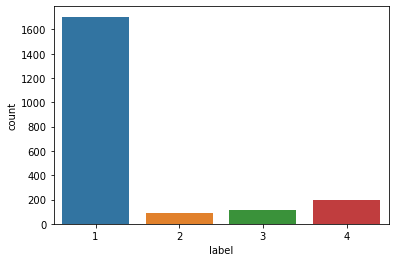

In [30]:
sns.countplot(df['label'])

## Распределение значений признаков

### Боксплоты

In [31]:
def plot_boxplots(df):
    plt.figure(figsize = (15,130))
    for ind, col in enumerate(df.columns):
        plt.subplot(38,4, ind+1)
        sns.boxplot(df[col])
        plt.xticks(rotation=35)
        plt.title(col, loc = "center")
    plt.tight_layout()

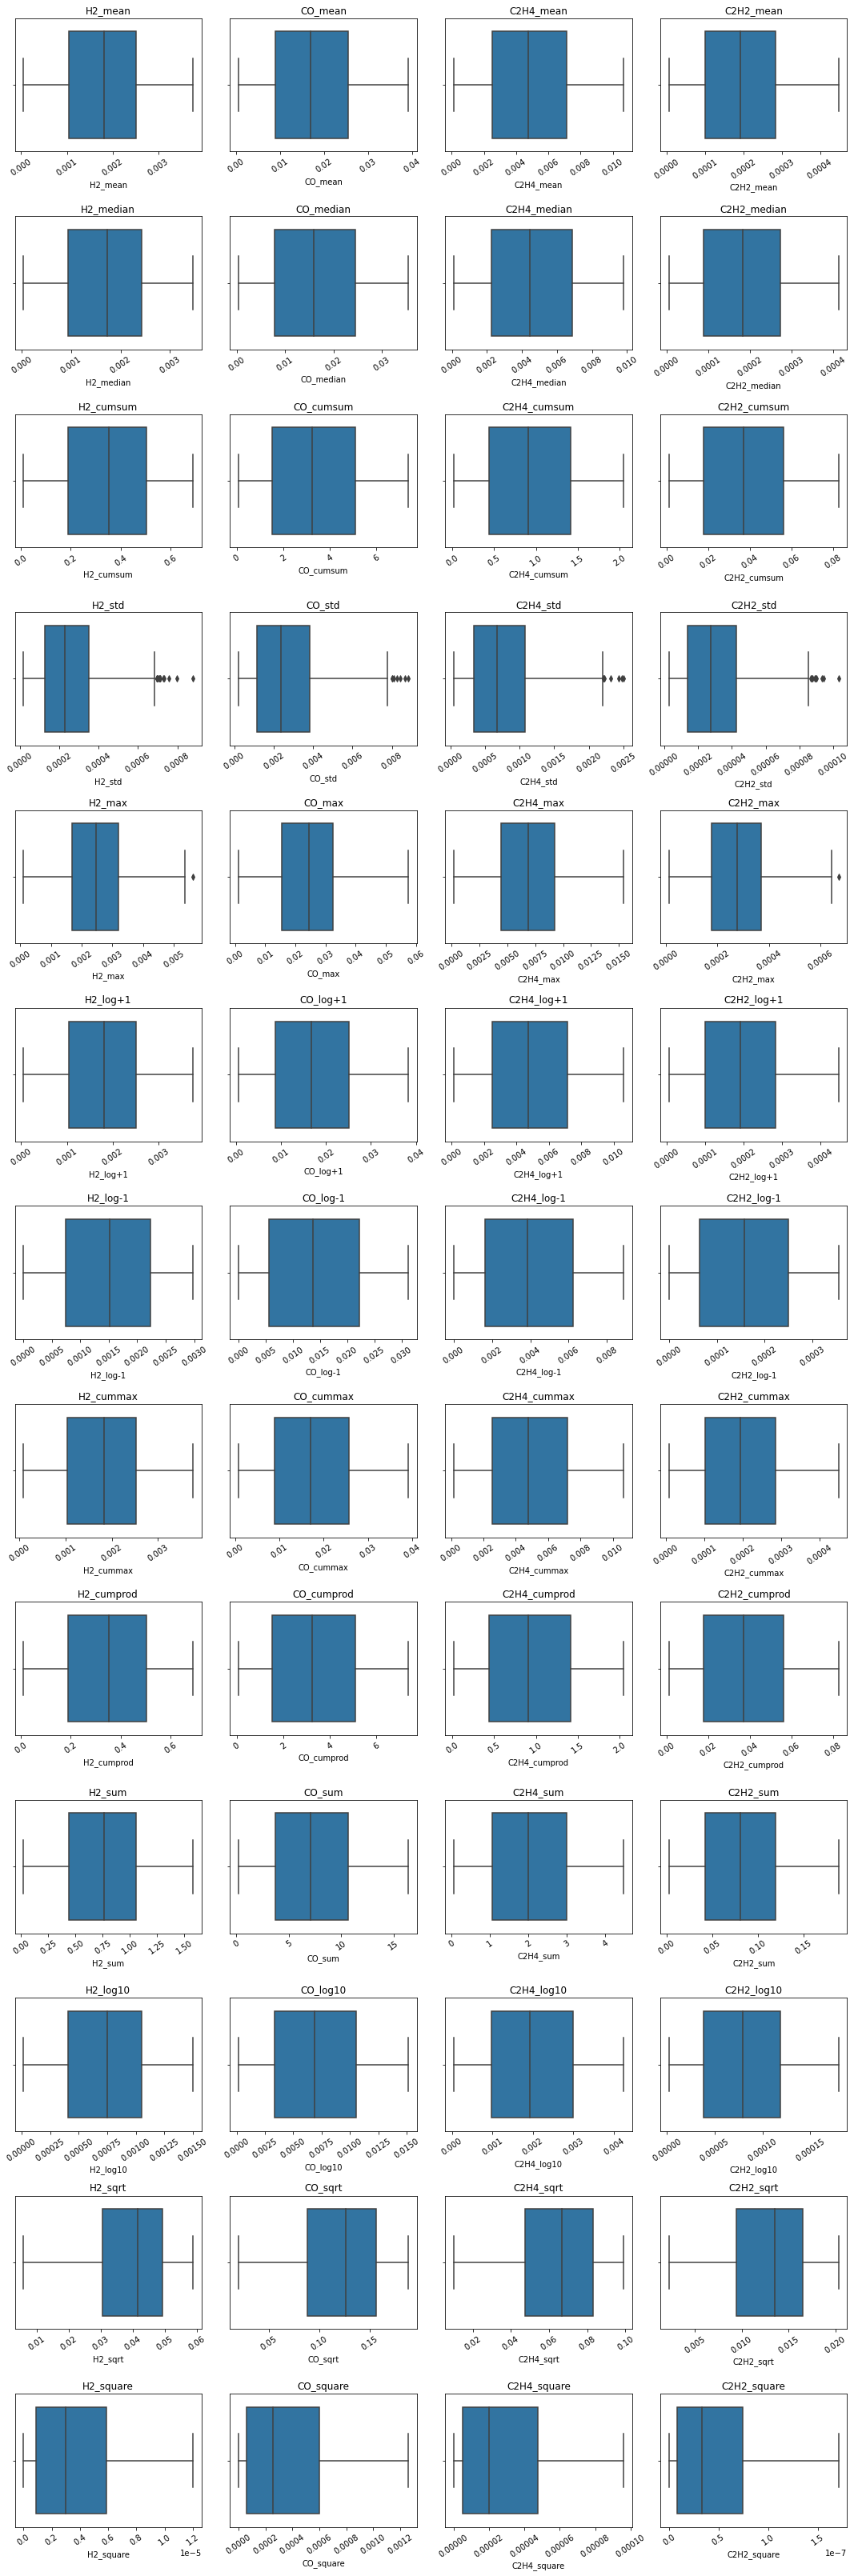

In [32]:
plot_boxplots(df.drop("label", axis = 1))

## Распределение целевой переменной по значениям признаков

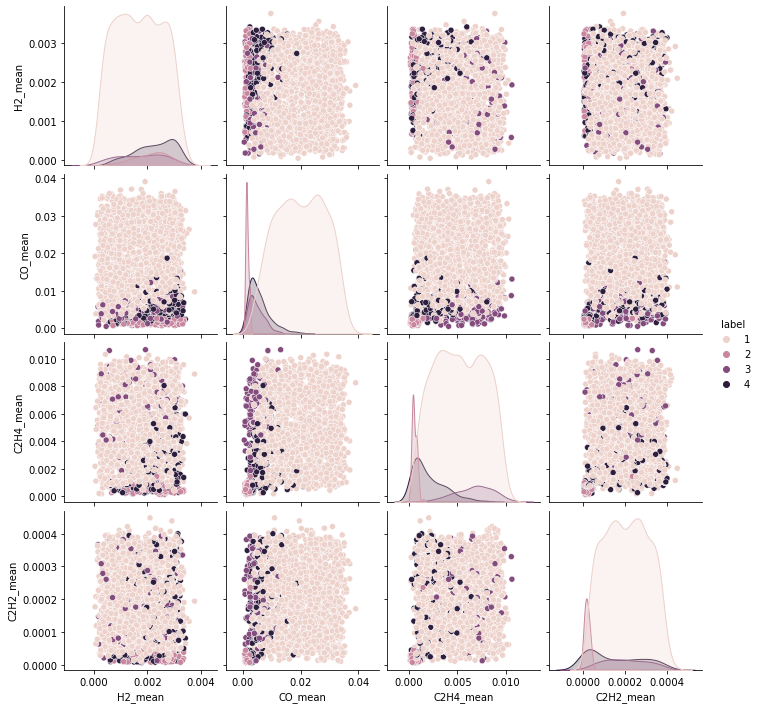

In [33]:
sns.pairplot(df[['H2_mean', 'CO_mean', 'C2H4_mean', 'C2H2_mean', "label"]], hue = "label")

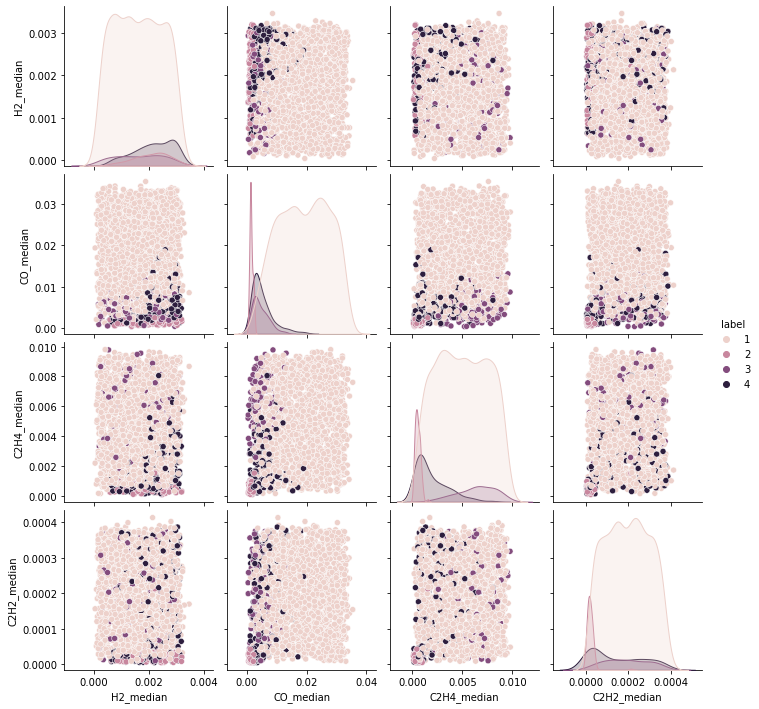

In [34]:
sns.pairplot(df[[ 'H2_median', 'CO_median', 'C2H4_median', 'C2H2_median', "label"]], hue = "label")

# Базовые ML решения

# Подготовка выборок

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [40]:
scal = StandardScaler()
df_scal = scal.fit_transform(df.drop("label", axis = 1))
df_scal = pd.DataFrame(df_scal, columns=df.drop("label", axis = 1).columns)

In [45]:
x = df_scal.copy() 
y = df["label"]

In [46]:
x_train_scal, x_test_scal, y_train_scal, y_test_scal = train_test_split(x, y, test_size = 0.2,
                                                                        random_state = 1, stratify = y)

In [50]:
x_train_scal.shape

(1680, 52)

In [47]:
X = df.drop("label", axis = 1).copy()

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

# Быстрое обучение базовых моделей

In [49]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [52]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('LGB', LGBMClassifier()))
models.append(('CB', CatBoostClassifier(verbose = 0)))



# evaluate each model in turn
results = []
names = []
d = {}
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = model_selection.cross_val_score(model, x_train_scal, y_train_scal, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
d = {"Models": names, "Accuracy": pd.Series(results).apply(np.mean)}
table = pd.DataFrame(d)
table

LR: 0.957143 (0.016366)
LDA: 0.919048 (0.027303)
KNN: 0.904167 (0.033508)
CART: 0.920238 (0.022144)
NB: 0.832738 (0.028354)
SVM: 0.934524 (0.027277)
RF: 0.939286 (0.024513)
GB: 0.938690 (0.019205)
[13:11:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:11:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:11:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objectiv

,Models,Accuracy
0,LR,0.957143
1,LDA,0.919048
2,KNN,0.904167
3,CART,0.920238
4,NB,0.832738
5,SVM,0.934524
6,RF,0.939286
7,GB,0.938690
8,XGB,0.951786
9,LGB,0.953571


In [ ]:
f1_weighted

In [53]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('LGB', LGBMClassifier()))
models.append(('CB', CatBoostClassifier(verbose = 0)))



# evaluate each model in turn
results = []
names = []
d = {}
scoring = 'f1_weighted'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = model_selection.cross_val_score(model, x_train_scal, y_train_scal, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
d = {"Models": names, "f1_weighted": pd.Series(results).apply(np.mean)}
table = pd.DataFrame(d)
table

LR: 0.956281 (0.017171)
LDA: 0.913236 (0.029719)
KNN: 0.895275 (0.041323)
CART: 0.918341 (0.018346)
NB: 0.852399 (0.023923)
SVM: 0.930395 (0.030299)
RF: 0.937610 (0.030917)
GB: 0.935254 (0.021040)
[13:33:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:33:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:33:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objectiv

,Models,f1_weighted
0,LR,0.956281
1,LDA,0.913236
2,KNN,0.895275
3,CART,0.918341
4,NB,0.852399
5,SVM,0.930395
6,RF,0.937610
7,GB,0.935254
8,XGB,0.949929
9,LGB,0.951538


# Настройка моделей

## Логистическая рагрессия

In [61]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [62]:
logit = LogisticRegression()
logit_params = {'C': np.logspace(-5, 5, 1000)}
logit_grid = GridSearchCV(logit, logit_params, cv=5)

In [63]:
logit_grid.fit(x_train_scal, y_train_scal)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 1.02331658e-05, 1.04717682e-05, 1.07159340e-05,
       1.09657929e-05, 1.12214777e-05, 1.14831241e-05, 1.17508713e-05,
       1.20248614e-05, 1.23052400e-05, 1.25921561e-05, 1.28857621e-05,
       1.31862140e-05, 1.34936714e-05, 1.38082977e-05, 1.41302599e-05,
       1.44597292e-05, 1.47968806e-05, 1.514189...
       5.88531578e+04, 6.02254120e+04, 6.16296626e+04, 6.30666554e+04,
       6.45371540e+04, 6.60419396e+04, 6.75818117e+04, 6.91575883e+04,
       7.07701066e+04, 7.24202233e+04, 7.41088152e+04, 7.58367791e+04,
       7.76050334e+04, 7.94145172e+04, 8.12661920e+04, 8.31610415e+04,
       8.51000725e+04, 8.70843150e+04, 8.91148232e+04, 9.11926760e+04,
       9.33189772e+04, 9.54948564e+04, 9.77214697e+04, 1.00000000e+05])})

In [64]:
logit_grid.best_params_, logit_grid.best_score_

({'C': 0.9014776314524917}, 0.9642857142857142)

In [65]:
logit_best = logit_grid.best_estimator_

In [66]:
print(classification_report(y_test_scal, logit_best.predict(x_test_scal)))

              precision    recall  f1-score   support

           1       0.98      0.99      0.99       341
           2       0.88      0.78      0.82        18
           3       0.91      0.91      0.91        22
           4       0.82      0.82      0.82        39

    accuracy                           0.96       420
   macro avg       0.90      0.87      0.88       420
weighted avg       0.96      0.96      0.96       420



In [ ]:
logit_grid.best_params_, logit_grid.best_score_

In [ ]:
logit_best = logit_grid.best_estimator_

In [ ]:
print(classification_report(y_test_scal, logit_best.predict(x_test_scal)))

## CatBoost